**Analyzing-Global-Pharmaceutical-Drug-Spending-Trends.**


*   Bryan Carlo Vital
*   Kyle Angelo Tuazon
*   Askelon Gomez





Dataset url = https://datahub.io/core/pharmaceutical-drug-spending

First 5 rows of the dataset:
  LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
0      AUS  1971       15.992   0.727   35.720        NaN       462.11
1      AUS  1972       15.091   0.686   36.056        NaN       475.11
2      AUS  1973       15.117   0.681   39.871        NaN       533.47
3      AUS  1974       14.771   0.755   47.559        NaN       652.65
4      AUS  1975       11.849   0.682   47.561        NaN       660.76

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)

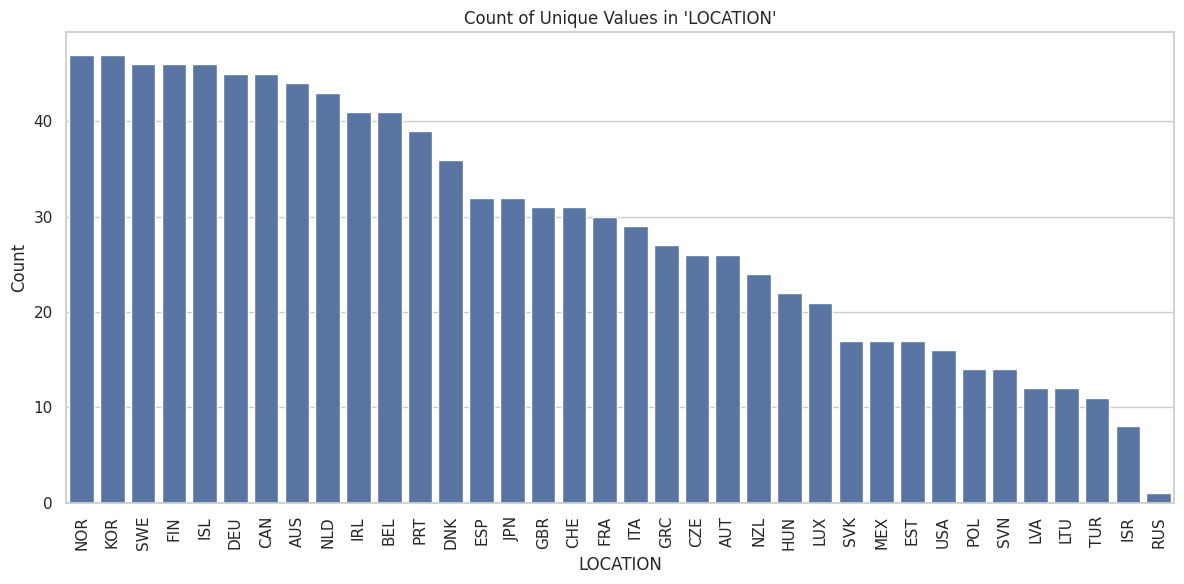

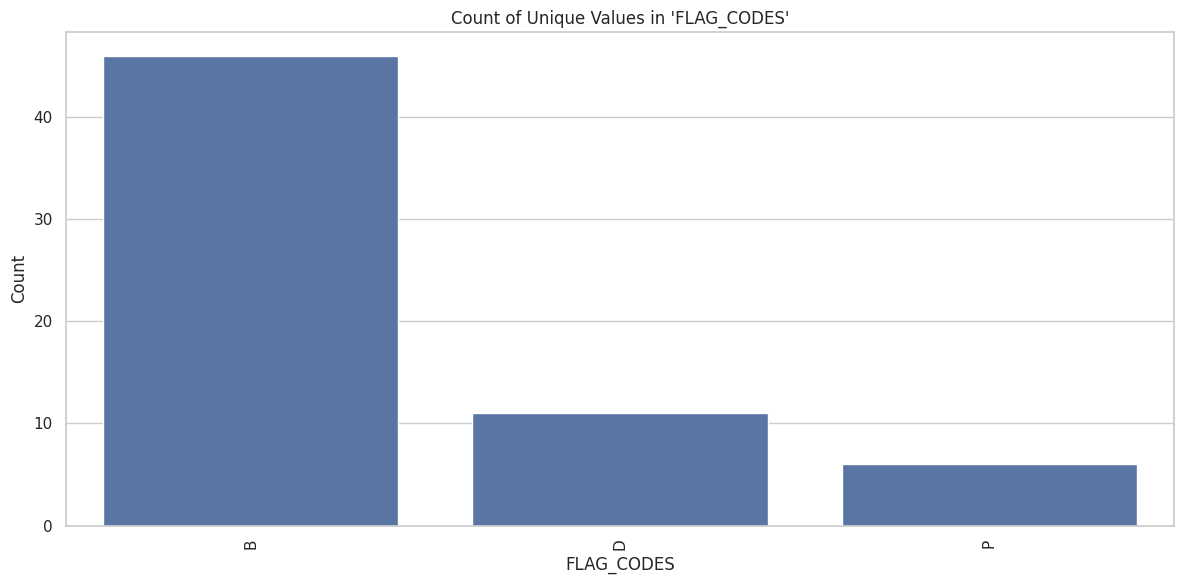

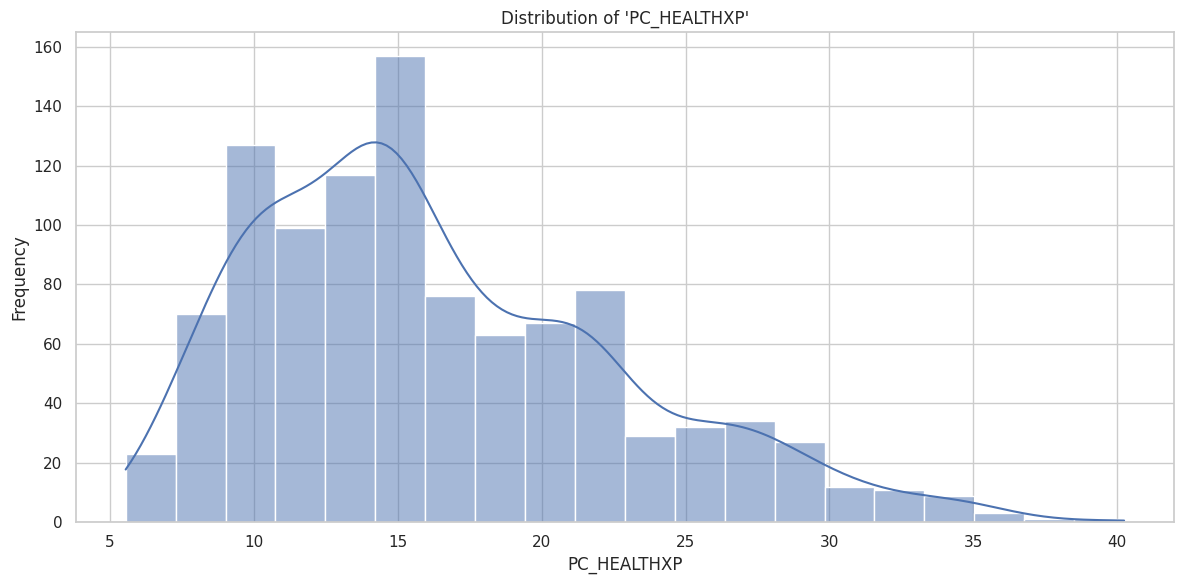

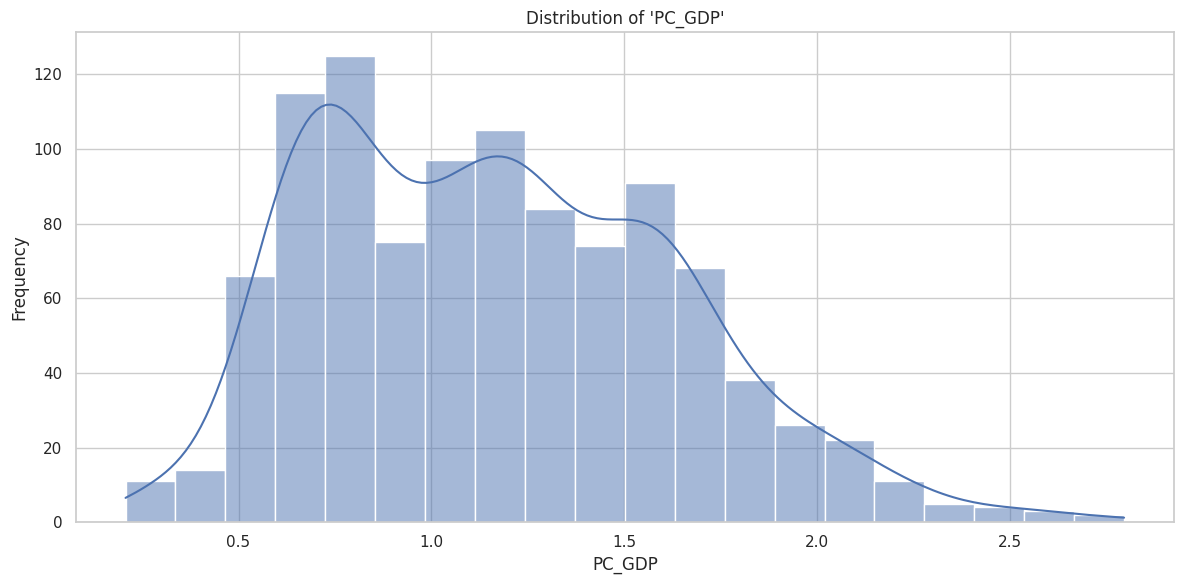

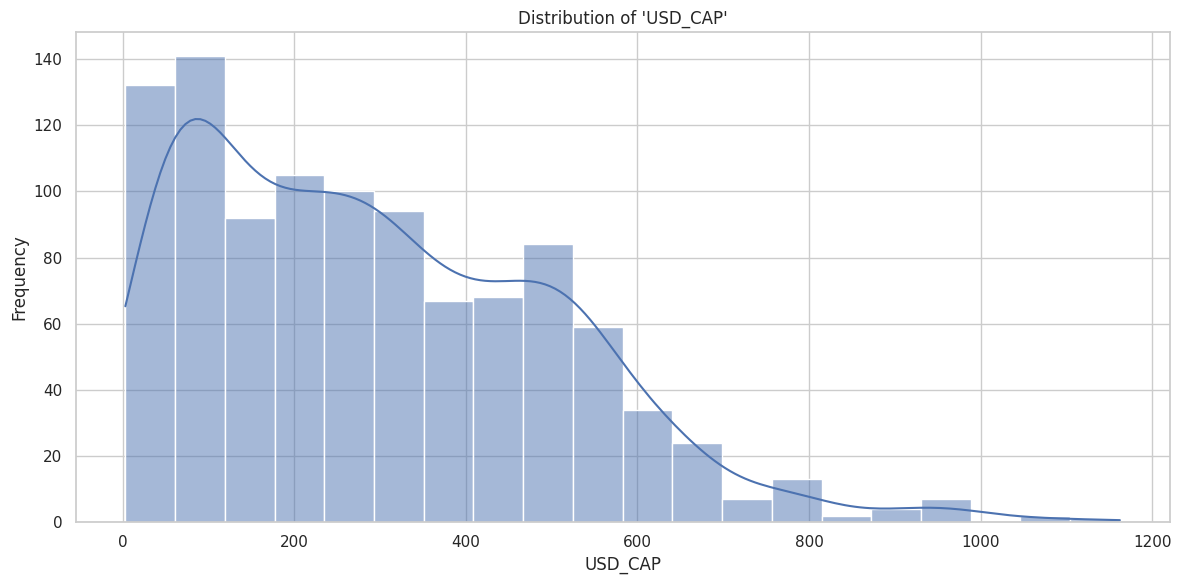

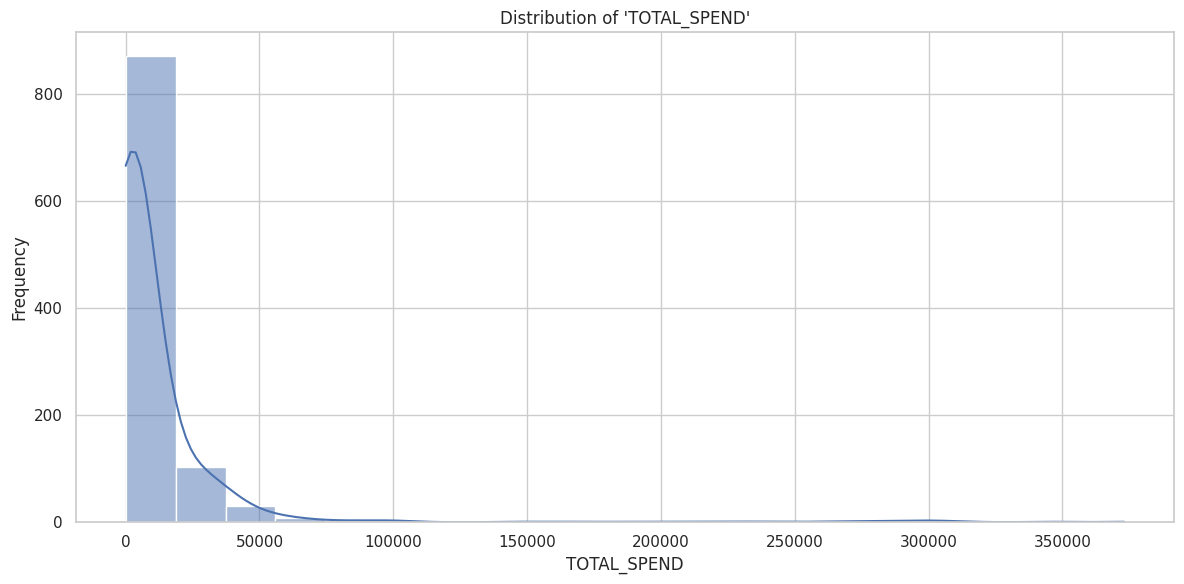


Missing Values per Column:
LOCATION         0
TIME             0
PC_HEALTHXP      0
PC_GDP           0
USD_CAP          0
FLAG_CODES     973
TOTAL_SPEND      0
dtype: int64


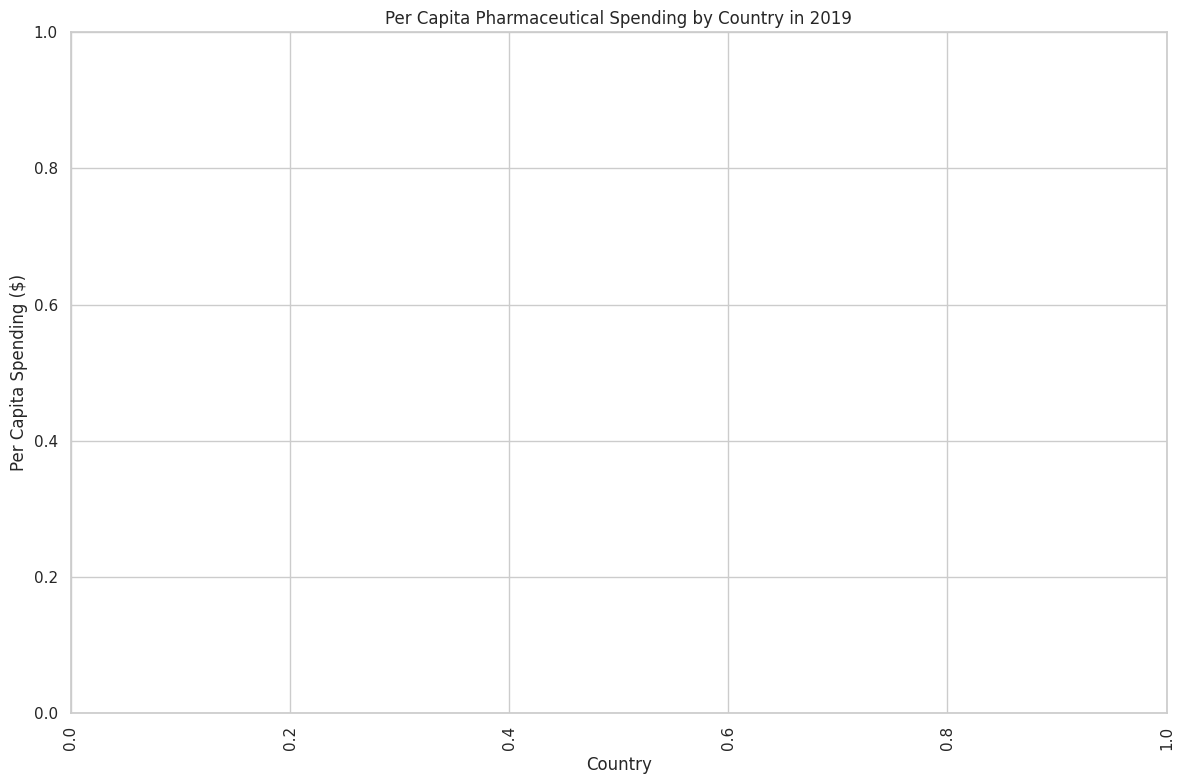

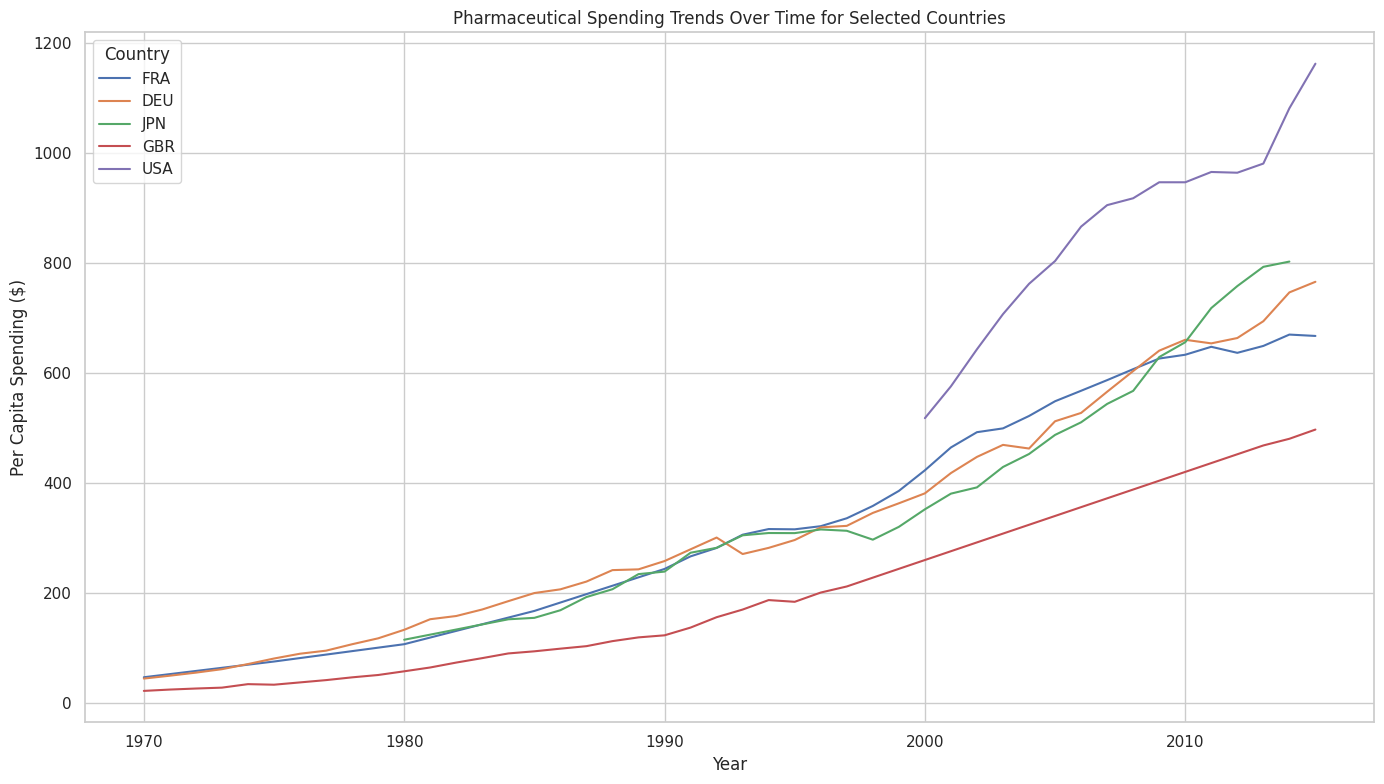

In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ensure plots are displayed in-line in Colab
%matplotlib inline

#dataset
url = '/content/data.csv'  # Ensure 'data.csv' is uploaded to your Colab environment
df = pd.read_csv(url)

#Display of first few rows of the dataset and its info
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())

#Visualize unique values in categorical columns
categorical_columns = ['LOCATION', 'FLAG_CODES']  # Adjust based on your dataset
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.title(f"Count of Unique Values in '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#Visualize unique values in numerical columns
numerical_columns = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']  # Adjust based on your dataset
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=20, kde=True)  # Using kde for smoother visualization
    plt.title(f"Distribution of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

#Data Preprocessing
#Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Filling missing values using forward fill method
df.ffill(inplace=True)

# Step 7: Filter for a specific year or country if needed for initial visualizations
# For example, filter data for the year 2019 (adjust if year 2019 data is not available)
df_filtered = df[df['TIME'] == 2019]

# Step 8: Visualization - Example 1: Bar plot of drug spending per capita by country in 2019
plt.figure(figsize=(12, 8))
sns.barplot(data=df_filtered, x='LOCATION', y='USD_CAP')
plt.xticks(rotation=90)
plt.title("Per Capita Pharmaceutical Spending by Country in 2019")
plt.xlabel("Country")
plt.ylabel("Per Capita Spending ($)")
plt.tight_layout()
plt.show()

# Step 9: Visualization - Example 2: Line plot of drug spending over time for selected countries
# Select a few countries for comparison
countries = ['USA', 'GBR', 'FRA', 'DEU', 'JPN']
df_countries = df[df['LOCATION'].isin(countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_countries, x='TIME', y='USD_CAP', hue='LOCATION')
plt.title("Pharmaceutical Spending Trends Over Time for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Per Capita Spending ($)")
plt.legend(title='Country')
plt.tight_layout()
plt.show()